# K-meansスクラッチ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from numpy.random import *

from sklearn.model_selection import train_test_split


In [2]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装

    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    
    def __init__(self, n_clusters=4, n_init=1, max_iter=100, tol =1, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol  = tol
        self.verbose = verbose
        
    def _initial_mean(self, data, n_clusters):
        """
        最初の中心点を決定する関数
        
        データの上から順にデータを取り出し、平均値を空のarrayに追加していく
        -------------------------
        引数
        data 
        n_clusters(クラスター数)
        --------------------------
        retrun
        中心点のarray (n_clusters, n_features)
        
        """
        mean_result_array = np.empty((0, data.shape[1]), int)
        array_list = []
        split_data_num = data.shape[0] / n_clusters
        for i in range(n_clusters):
            a = int(i * split_data_num)
            b = int(a + split_data_num)
            K_data = data[a:b, :]
            mean_result_array = np.append(mean_result_array, [K_data.mean(axis=0)], axis=0)
            
        return mean_result_array
    
    def _decision_class(self, X, mean_array):
        """
        データがどのクラスターに所属するかを決定する関数
        
        距離行列を作成する。
        それぞれのデータから各クラスターまでの距離を算出し、距離行列に追加
        最も小さい値のインデックスを取得
        
        ---------------------------------
        引数
        X:　データ array
        mean_array : 中心点のデータ　　array
        ----------------------------------
        return
        label_array:データの順番でクラスターの値が入っているarray
        
        """
        self.dis_array = np.empty((X.shape[0], mean_array.shape[0]), float)
        for n in range(X.shape[0]):
            for k in range(mean_array.shape[0]):
                self.dis_array[n , k] = np.linalg.norm(X[n] - mean_array[k])
                
        label_array  = np.argmin(self.dis_array, axis=1)
        return label_array
    
    def _new_mean(self, X, label_array, mean_array):
        """
        中心点を更新し、新しい中心点を返す関数
        
        クラスター毎にインデックスを取得し、そのデータを取り出す
        データの平均値を空のarrayに追加していく
        ----------------------------
        引数
        X : 元データ
        label_array:データの順番でクラスターの値が入っているarray
        mean_array:その時点での中心点
        -----------------------------
        return
        new_array_mean:新しい中心点のarray
        """
        new_array_mean = np.empty((0, X.shape[1]), float)
        for i in range(mean_array.shape[0]):
            k_index = np.where(label_array == i)
            k_data = X[k_index]
            k_mean = k_data.mean(axis=0)
            new_array_mean = np.append(new_array_mean, [k_mean], axis=0)
            
        return new_array_mean
    
    def _SSE(self, X, mean_array):
        """
        SSEを求める関数
        
        距離行列用の空のarrayを作成
        データから中心点までの距離を求め距離行列のarrayに追加
        その中で最小の値を取り出し、合計する
        -------------------------------
        引数
        X:データ
        mean_array:中心点のarray
        ------------------------------
        return
        self.SSE:SSEの値
        """
        self.SSE = np.empty((X.shape[0], mean_array.shape[0]), float)
        for k in range(mean_array.shape[0]):
            for n in range(X.shape[0]):
                self.SSE[n, k] = np.linalg.norm(X[n] - mean_array[k])
                
        self.SSE = np.amin(self.SSE, axis=1)
        
        return np.sum(self.SSE)

    def SSE_plot(self, num_class):
        """
        任意のクラスターの数に応じたグラフをプロットする関数
        
        設定したクラスターの数分だけ行う
        毎回適当な中心点を決め、その中心点に応じたSSEを取得し、リストに保存
        SSEをプロットする
        ---------------------------------
        引数
        num_class:設定したクラスター数
        _________________
        return
        
        """
        SSE_result_list = []
        for i in range(num_class):
            mean_result= self._initial_mean(X, i+1)
            SSE_result_list.append(self._SSE(self.X, mean_result))
            
        self.SSE_result_list = SSE_result_list
        plt.plot(SSE_result_list)
        
    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        """
        #元のデータを保持する
        self.X = X.copy()
        
        #最初の中心点を適当に決めるにあたってデータをシャッフルする
        np.random.shuffle(X)
        
        
        decision_point = 1e10
        #最初の中心点を決定する
        for i in range(self.n_init):
            mean_array = self._initial_mean(X,  self.n_clusters)
            sse = self._SSE(X, mean_array)
            if sse < decision_point:
                decision_point = sse
                self.mean_array = mean_array
                
        #中心点を更新する
        for i in range(self.max_iter):
            new_label = self._decision_class(self.X, self.mean_array)
            if (self.mean_array - self._new_mean(self.X, new_label, self.mean_array)).any() < self.tol:
                break
            self.mean_array = self._new_mean(self.X, new_label, self.mean_array)
            
        self._SSE(self.X, self.mean_array)
            

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.mean_array)
            
    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        
        #self.mean_arrayに基づいたクラス分類を行う
        self.dis_array_result = np.empty((X.shape[0], self.mean_array.shape[0]), float)
        for n in range(X.shape[0]):
            for k in range(self.mean_array.shape[0]):
                self.dis_array_result[n , k] = np.linalg.norm(X[n] - self.mean_array[k])
                
        label_array  = np.argmin(self.dis_array_result, axis=1)
        
        return label_array
        
        

## クラスタリングのための人工データセット

In [3]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [4]:
skm = ScratchKMeans()
skm.fit(X)
skm.SSE

array([0.64471883, 0.65931349, 0.43284435, 0.21126946, 0.88301701,
       0.22388804, 0.89430908, 0.50786889, 1.24705982, 0.17158362,
       0.81143441, 0.84948708, 0.51236944, 0.28185258, 0.5151549 ,
       1.24911132, 1.04435102, 1.17613645, 0.42618024, 0.93302326,
       1.40171995, 0.57310776, 0.43818742, 0.88699675, 0.43307654,
       0.53977176, 1.06202919, 0.13607807, 1.19435825, 0.67161591,
       0.36851615, 0.80155767, 0.30888758, 0.82783944, 0.36862486,
       0.49353581, 1.06147386, 0.56057535, 1.32694021, 0.74263063,
       0.71671383, 0.12352729, 1.08296942, 0.61888129, 0.48065021,
       0.7716055 , 0.51584758, 0.39098599, 0.31521223, 1.08518947,
       0.68332485, 0.10061224, 0.38734112, 0.77227996, 0.90139539,
       0.29743774, 0.6311439 , 0.42795772, 0.37387212, 0.65560102,
       0.63553054, 0.6585591 , 0.18383075, 1.08474207, 0.70759255,
       0.69569828, 0.82625632, 0.76084211, 0.4525277 , 0.30901166,
       0.64606709, 0.6448446 , 0.18433208, 0.22291534, 0.13604

In [5]:
skm.predict(X)

array([0, 1, 0, 3, 0, 1, 0, 3, 3, 1, 1, 1, 1, 2, 0, 0, 1, 3, 2, 3, 1, 0,
       2, 3, 0, 0, 2, 2, 1, 3, 0, 1, 3, 0, 2, 0, 2, 3, 0, 0, 1, 1, 1, 1,
       2, 1, 0, 3, 2, 1, 0, 0, 2, 3, 1, 1, 3, 1, 2, 3, 2, 1, 1, 1, 0, 2,
       0, 2, 3, 2, 3, 0, 2, 2, 2, 3, 3, 2, 2, 2, 1, 2, 1, 3, 0, 2, 3, 3,
       3, 2, 0, 2, 0, 0, 0, 3, 3, 3, 1, 3])

## 【問題1】中心点の初期値を決める

## 【問題2】SSEを求める関数の作成


## 【問題3】クラスタへの割り当て

## 【問題4】中心点の移動

## 【問題5】繰り返し

## 【問題6】異なる初期値で計算

## 【問題7】推定


## 【問題8】エルボー法の実装

In [6]:
skm = ScratchKMeans()
skm.fit(X)
skm.SSE

array([0.5151549 , 0.68332485, 0.69569828, 0.90139539, 0.63553054,
       0.64471883, 0.64606709, 0.43818742, 0.76084211, 0.87109638,
       0.15486174, 0.76710651, 1.40171995, 0.42795772, 0.65560102,
       0.28185258, 0.18433208, 0.36862486, 0.76926451, 0.48065021,
       0.22388804, 0.53297227, 1.04435102, 0.27155179, 0.54123225,
       0.81143441, 0.10061224, 0.39250153, 0.13604034, 0.89430908,
       1.08296942, 0.43307654, 0.92184022, 0.57310776, 0.70759255,
       0.51236944, 0.51584758, 1.17613645, 0.80155767, 0.7716055 ,
       0.80703835, 0.21126946, 1.26358067, 0.19659349, 0.6448446 ,
       0.43284435, 0.65931349, 0.53977176, 1.24911132, 1.08518947,
       1.32694021, 0.84948708, 0.30888758, 0.50809131, 0.13607807,
       0.31521223, 0.47489562, 0.49353581, 0.4525277 , 0.82625632,
       0.93302326, 1.24705982, 0.88301701, 0.30901166, 0.17158362,
       0.36851615, 0.50786889, 0.6585591 , 0.38734112, 1.19435825,
       0.12352729, 0.22291534, 0.99231767, 0.88699675, 0.35574

In [7]:
skm.predict(X)

array([0, 1, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0, 1, 1, 1, 2, 1, 3, 0, 1,
       2, 3, 1, 3, 3, 1, 3, 0, 3, 1, 2, 2, 3, 3, 1, 2, 3, 1, 2, 2, 0, 0,
       0, 0, 2, 3, 0, 0, 0, 2, 0, 3, 2, 1, 2, 3, 0, 3, 3, 3, 1, 0, 2, 2,
       3, 3, 2, 0, 1, 2, 1, 1, 3, 1, 2, 0, 1, 0, 2, 1, 2, 2, 3, 1, 0, 3,
       3, 1, 2, 3, 3, 3, 2, 1, 1, 3, 0, 0])

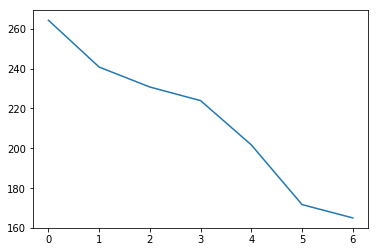

In [8]:
skm.SSE_plot(7)

#### このグラフからは谷は５個になっており、クラスター数は５個が良いと考えられる。しかし、クラスタ数を増やせば増やすほどSSEの値が減少していると思われる。

# クラスタ分析

## 卸売業者のデータ分析

## 次元削減


[0.45961362 0.86478588 0.93481596 0.97883941 0.99386152 1.
 1.         1.        ]


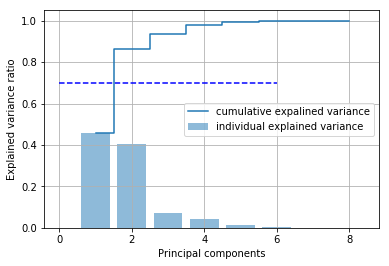

In [9]:
data = pd.read_csv("Wholesale customers data.csv")
data_drop = data.drop(columns = ["Channel", "Region"])
data_log = np.log(data_drop)


from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data_log)
data_pca = pca.transform(data_log)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,9), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,9), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

## 【問題10】クラスタ数kの選択
- エルボー図からは最適なクラスタ数は4のように思える

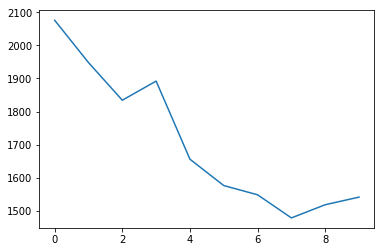

In [10]:
skm_data = ScratchKMeans()
skm_data.fit(data_pca)
skm_data.SSE_plot(10)

<function matplotlib.pyplot.show(*args, **kw)>

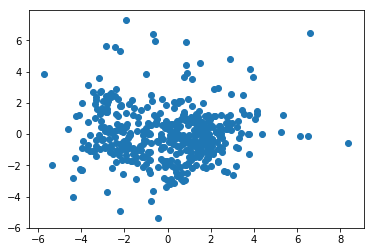

In [11]:
plt.scatter(data_pca[:,0],data_pca[:,1])
plt.show

In [12]:
skm_2_clusters = ScratchKMeans(n_clusters = 4)

skm_2_clusters.fit(data_pca)

y_pred_data2 = skm_2_clusters.predict(data_pca)

## 【問題11】既知のグループとの比較
- channel:2, region:2, cluster:2の集団は比較的数が似ている

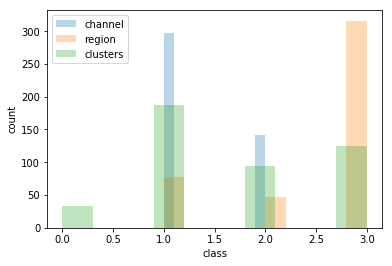

In [13]:
plt.hist(data.loc[:,"Channel" ], alpha = 0.3, label="channel")
plt.hist(data.loc[:,"Region" ], alpha = 0.3, label="region")
plt.hist(y_pred_data2, alpha = 0.3, label="clusters")
plt.xlabel("class")
plt.ylabel("count")
plt.legend()
plt.show()

## 【問題12】卸売業者にとって有益な情報


In [14]:
data_2 = data.copy()
data_2["cluster"] = y_pred_data2
data_2

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,3
1,2,3,7057,9810,9568,1762,3293,1776,3
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,3
5,2,3,9413,8259,5126,666,1795,1451,3
6,2,3,12126,3199,6975,480,3140,545,1
7,2,3,7579,4956,9426,1669,3321,2566,2
8,1,3,5963,3648,6192,425,1716,750,3
9,2,3,6006,11093,18881,1159,7425,2098,3


In [15]:
data_2.groupby(["Channel", "Region", "cluster"]).mean().round()

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Channel Region cluster                                                        
1       1      0        20190.0   3688.0   5910.0  2579.0             509.0   
               1        12081.0   4584.0   4358.0  3026.0            1338.0   
               2        10640.0   2690.0   2622.0  1815.0             669.0   
               3        13282.0   3874.0   4047.0  4109.0             829.0   
        2      0         9155.0   1897.0   5167.0  2714.0             228.0   
               1        15995.0   3573.0   5687.0  7796.0             625.0   
               2         6545.0   1464.0   3324.0  3791.0             317.0   
               3         9854.0   1454.0   3521.0  4858.0             438.0   
        3      0        12353.0   3054.0   4228.0  3387.0             845.0   
               1        12366.0   3550.0   3972.0  3660.0             800.0   
               2        14414.0   3950.0   4148.0  4393.0             759.0   
               3        16842.0   3034.0   3314.0  2970.0             768.0   
2       1      1         7391.0  11299.0  17918.0  3247.0            7948.0   
               3         2462.0  10140.0  19165.0  1755.0            8571.0   
        2      0          918.0  20655.0  13567.0  1465.0            6846.0   
               1         5161.0   9000.0  13240.0  2248.0            7903.0   
               2         4823.0   6101.0   9163.0   561.0            4799.0   
               3        11690.0   9095.0  23317.0  1162.0           10761.0   
        3      0        18770.0  26649.0  22972.0  2290.0           10588.0   
               1         8884.0  10824.0  15111.0  1386.0            6157.0   
               2         9489.0   8299.0  16108.0  1424.0            6894.0   
               3         9081.0   9173.0  15167.0  1560.0            6983.0   

                        Delicassen  
Channel Region cluster              
1       1      0             837.0  
               1            1300.0  
               2            1171.0  
               3            1195.0  
        2      0            1113.0  
               1            1449.0  
               2            1037.0  
               3             793.0  
        3      0            1653.0  
               1            1126.0  
               2            2214.0  
               3            1497.0  
2       1      1            2309.0  
               3            1326.0  
        2      0             806.0  
               1            1496.0  
               2             517.0  
               3            1316.0  
        3      0            3636.0  
               1            1675.0  
               2            1591.0  
               3            1748.0

In [16]:
data_2_groupby_cluster = data_2.groupby(["cluster"]).mean().round()
data_2_groupby_cluster

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,,,
0,1.0,3.0,14653.0,9368.0,9338.0,2920.0,3319.0,1968.0
1,1.0,3.0,11172.0,5988.0,7820.0,3227.0,2768.0,1370.0
2,1.0,3.0,11976.0,4827.0,7092.0,3165.0,2402.0,1809.0
3,1.0,2.0,12557.0,5304.0,8435.0,2810.0,3300.0,1424.0


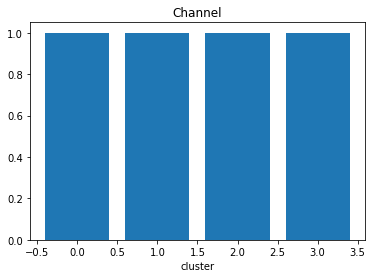

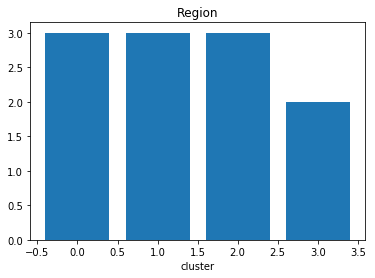

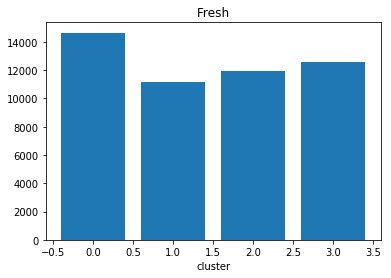

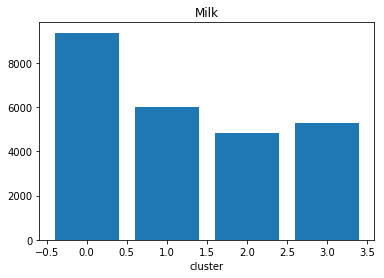

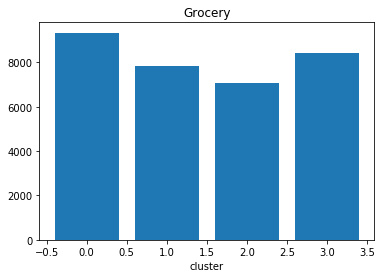

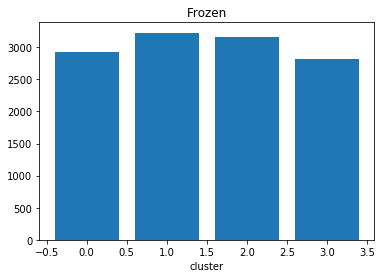

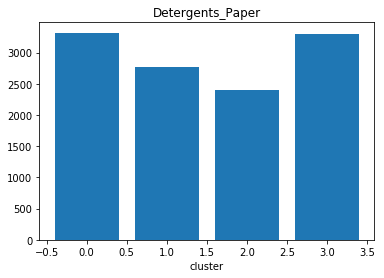

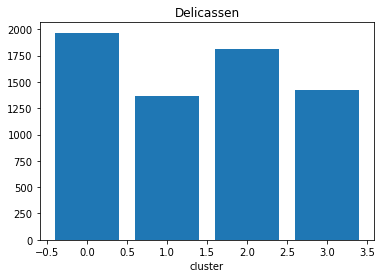

In [17]:
for col in data_2_groupby_cluster :
    plt.title(col)
    plt.xlabel("cluster")
    plt.bar(x = [0, 1, 2, 3], height=data_2_groupby_cluster[col])
    plt.show()

cluster:１の人は, cluster:2, cluster3に比べ消費しやすい
特にDelicassenは顕著に高い
cluster:1の人はchannel:1の人が多い
channel:2の中でcluster:0の人はDetergents_Paperをよく購入する、しかしregion:3の人はあまり購入しない。

cluster:1の人はchannel:1の人が多く、このセクションの購入が多いため、ホテル・レストランに向けたプロモーションを強化する

channel:2でcluster:0の人のDetergents_Paperの購入が多い、一方region:3の人が高くない。
なので、リスボン・ポルトでの個人向けDetergents_Paperの広告を増やす、特にcluster:0の人の特徴に合わせて行う。